ANN / CNN Image Classification — CIFAR-10 (Keras)
Author: (Mika Agloro)
Date: (October 2025)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Load Dataset

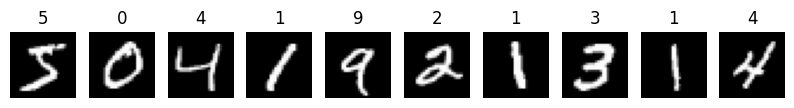

Train shape: (60000, 784) Test shape: (10000, 784)


In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Show first 10 training images (before normalization/flattening)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten 28x28 images into vectors of size 784
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

print("Train shape:", x_train.shape, "Test shape:", x_test.shape)


Build ANN Model

In [10]:
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

 Compile

In [12]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


Train

In [15]:
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=2
)

Epoch 1/10
422/422 - 4s - 10ms/step - accuracy: 0.9761 - loss: 0.0787 - val_accuracy: 0.9815 - val_loss: 0.0627
Epoch 2/10
422/422 - 4s - 10ms/step - accuracy: 0.9773 - loss: 0.0700 - val_accuracy: 0.9818 - val_loss: 0.0670
Epoch 3/10
422/422 - 4s - 9ms/step - accuracy: 0.9800 - loss: 0.0641 - val_accuracy: 0.9823 - val_loss: 0.0629
Epoch 4/10
422/422 - 4s - 9ms/step - accuracy: 0.9829 - loss: 0.0550 - val_accuracy: 0.9828 - val_loss: 0.0581
Epoch 5/10
422/422 - 5s - 11ms/step - accuracy: 0.9825 - loss: 0.0531 - val_accuracy: 0.9820 - val_loss: 0.0616
Epoch 6/10
422/422 - 4s - 8ms/step - accuracy: 0.9834 - loss: 0.0506 - val_accuracy: 0.9843 - val_loss: 0.0594
Epoch 7/10
422/422 - 4s - 9ms/step - accuracy: 0.9848 - loss: 0.0452 - val_accuracy: 0.9853 - val_loss: 0.0625
Epoch 8/10
422/422 - 5s - 11ms/step - accuracy: 0.9866 - loss: 0.0428 - val_accuracy: 0.9842 - val_loss: 0.0614
Epoch 9/10
422/422 - 4s - 8ms/step - accuracy: 0.9866 - loss: 0.0404 - val_accuracy: 0.9827 - val_loss: 0.06

Evaluation

Test Accuracy: 0.9825, Test Loss: 0.0622


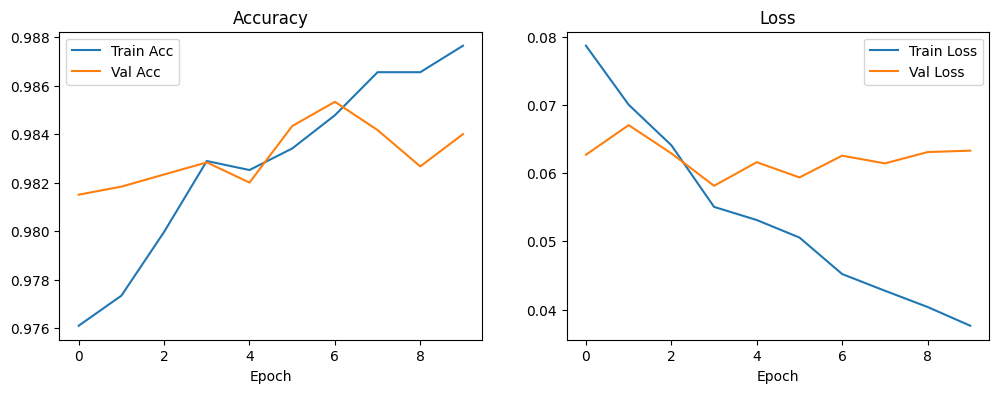

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Plot accuracy/loss curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend(); plt.title("Accuracy"); plt.xlabel("Epoch")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend(); plt.title("Loss"); plt.xlabel("Epoch")
plt.show()

Confusion Matrix & Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


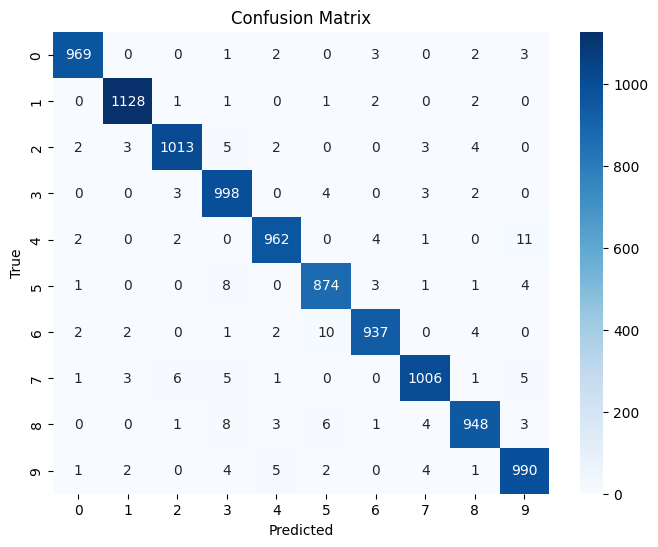

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [17]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))